# LEITURA DOS CSV E ESCRITA EM ARQUIVO COMBINADO

In [2]:
import sys
sys.path.append('../analysis_pet_shop/') #  caminho relativo (supondo que a pasta modulos está um nível acima do notebook)
import importlib
import utils_graphics
import utils_import as ui
import utils_files as uf
importlib.reload(utils_graphics)
import pandas as pd

# Definir o diretório onde estão os arquivos .csv
# Use '.' para o diretório atual ou substitua pelo caminho da pasta
loja = 'Manaíra'
grupo = 'Ração'
empresa = 'Hobby Bichos'
directory = 'D:/Dropbox/Documentos/Consultorias/'+empresa+'/'+loja+'/'+grupo+'/Presentes/Dados Brutos' 
currenty_time = pd.to_datetime('now').strftime('%Y-%m-%d %H:%M:%S').replace(":","_")
file_out = f"/Arquivos Combinados/combined_file_{currenty_time}.csv"
reports = 'D:/Dropbox/Documentos/Consultorias/'+empresa+'/'+loja+'/'+grupo+'/Presentes/Reports' 
# Exemplo de uso
combined_df, file_out  = uf.merge_csv_files_in_dataframe(directory, directory + file_out)
data_out = f'{directory}/Dados Saída/{currenty_time}.csv'

print(f'Todos os arquivos CSV foram combinados com sucesso e salvos em {file_out}!')

ModuleNotFoundError: No module named 'pandas'

In [164]:
ui.charge_reload()

In [165]:
# apresentação do df_combined
df = combined_df
df.head(10)

,Data Emissão,Numero da venda,Animal,Cliente,SMS,E-mail,Cod Produto,Descrição,Quant.,Veterinário
0,07/01/2022,29124,NaN,MIRTES,NaN,NaN,8368,GOLDEN GATO CASTR SENIOR 1KG,1,NaN
1,26/03/2022,54211,NaN,CLAUDIA FIGUEIREDO,(83) 99168-8129,NaN,963,ROYAL CANIN HYPOALLERGENIC SMALL 2KG,1,NaN
2,04/01/2022,62309,NaN,SEM CADASTRO,NaN,NaN,4941,PATE THREE DOGS CORDEIRO ADULTO 150G,5,NaN
3,10/05/2022,92434,NaN,AIULA MORAIS,(83) 9911-88880,NaN,2388,VET LIFE FELINE RENAL 2KG,1,NaN
4,08/01/2022,104667,NaN,ZANETE,(81) 9813-08809,NaN,147826,RAÇAO HILLS AD MINI 800G,1,NaN
5,21/04/2022,111323,THOR,SIMONE SALDANHA (THOR AKITA),(83) 98769-4020,NaN,9284,RACAO VET LIFE CANINE ULTRAHYPO 10KG,1,NaN
6,31/01/2022,114875,MEL,SERGIO (MEL SHITZU),(83) 9880-19188,NaN,1940,"PREMIER SHIHTZU AD FRANGO 2,5KG",1,NaN
7,23/03/2022,116424,NaN,SEM CADASTRO,NaN,NaN,12503,DOG EXCELLENCE ESSENCE RG AD 1KG UNIDADE,1,NaN
8,02/06/2022,133513,NaN,NAEDJA - BOIADEIRO,(83) 99810-0293,NaN,401415,CIBAU ADULT MEDIUM 15KG,1,NaN
9,11/03/2022,159220,LULI,ANA CLAUDIA(JADE),(83) 99921-2621,NaN,234447,RACAO PREMIER GATOS AMB INT AD CASTR 6MESES-6A...,1,NaN


In [166]:
df.shape

(73257, 10)

# ANÁLISE DE VALORES REPETIDOS NO DATAFRAME

In [167]:
import utils_prepared_data as upd
# Coluna a ser analisada
coluna = 'Numero da venda'

num_repeated = upd.count_occurences(df, coluna)

print("Valores repetidos e suas quantidades:")
print(num_repeated)

Valores repetidos e suas quantidades:
Numero da venda
85499783    19
89929974    17
72401438    11
36604108    11
42983172    10
            ..
36178162     2
24793561     2
99804784     2
16822544     2
22272622     2
Name: count, Length: 6704, dtype: int64


In [168]:
df.shape

(73257, 10)

In [169]:
df = upd.drop_repeated_column(df, coluna)

Há 7848 valores repetidos na coluna 'Numero da venda'.
Há 0 valores repetidos na coluna 'Numero da venda'.


In [170]:
df.head(10)

,Data Emissão,Numero da venda,Animal,Cliente,SMS,E-mail,Cod Produto,Descrição,Quant.,Veterinário
0,07/01/2022,29124,NaN,MIRTES,NaN,NaN,8368,GOLDEN GATO CASTR SENIOR 1KG,1,NaN
1,26/03/2022,54211,NaN,CLAUDIA FIGUEIREDO,(83) 99168-8129,NaN,963,ROYAL CANIN HYPOALLERGENIC SMALL 2KG,1,NaN
2,04/01/2022,62309,NaN,SEM CADASTRO,NaN,NaN,4941,PATE THREE DOGS CORDEIRO ADULTO 150G,5,NaN
3,10/05/2022,92434,NaN,AIULA MORAIS,(83) 9911-88880,NaN,2388,VET LIFE FELINE RENAL 2KG,1,NaN
4,08/01/2022,104667,NaN,ZANETE,(81) 9813-08809,NaN,147826,RAÇAO HILLS AD MINI 800G,1,NaN
5,21/04/2022,111323,THOR,SIMONE SALDANHA (THOR AKITA),(83) 98769-4020,NaN,9284,RACAO VET LIFE CANINE ULTRAHYPO 10KG,1,NaN
6,31/01/2022,114875,MEL,SERGIO (MEL SHITZU),(83) 9880-19188,NaN,1940,"PREMIER SHIHTZU AD FRANGO 2,5KG",1,NaN
7,23/03/2022,116424,NaN,SEM CADASTRO,NaN,NaN,12503,DOG EXCELLENCE ESSENCE RG AD 1KG UNIDADE,1,NaN
8,02/06/2022,133513,NaN,NAEDJA - BOIADEIRO,(83) 99810-0293,NaN,401415,CIBAU ADULT MEDIUM 15KG,1,NaN
9,11/03/2022,159220,LULI,ANA CLAUDIA(JADE),(83) 99921-2621,NaN,234447,RACAO PREMIER GATOS AMB INT AD CASTR 6MESES-6A...,1,NaN


In [171]:
df.shape

(65409, 10)

# AGRUPAMENTO DOS DADOS POR QUANTIDADE DE ATENDIMENTOS

In [172]:
'''
groupby('coluna_de_agrupamento').size(): 
Agrupa o DataFrame pela coluna especificada e conta o número de ocorrências em cada grupo.

reset_index(name='contagem'): 
Restaura o índice, transformando-o em uma coluna e nomeia essa coluna de contagem como "contagem".
'''
column_date = 'Data Emissão'

# Agrupar pelo valor de 'coluna_de_agrupamento' e contar ocorrências
df_grouped = df.groupby(column_date).size().reset_index(name='Quantidade')

df_grouped.head(10)

,Data Emissão,Quantidade
0,01/02/2022,41
1,01/02/2023,46
2,01/02/2024,63
3,01/02/2025,67
4,01/03/2022,21
5,01/03/2023,48
6,01/03/2024,79
7,01/03/2025,73
8,01/04/2022,62
9,01/04/2023,56


In [173]:
#column_date = 'Data Emissão'
# Agrupando o DataFrame pela coluna 'coluna_de_agrupamento' e calculando a média
#df_grouped = df.groupby(column_date).count().reset_index()

# Selecionando apenas a coluna desejada e atualizando o DataFrame
#df_grouped = df_grouped.loc[:, [column_date]]

#print(df_grouped)

In [174]:
df_grouped.dtypes

Data Emissão    object
Quantidade       int64
dtype: object

In [175]:
# Converte a coluna 'Data Emissão' de 'object' para 'datetime'
df_grouped['Data Emissão'] = pd.to_datetime(df_grouped['Data Emissão'], dayfirst=True)

In [176]:
# Renomear as colunas
df_grouped.rename(columns={'Data Emissão': 'date_service', 'Quantidade': 'count'}, inplace=True)

In [177]:
df_grouped.dtypes

date_service    datetime64[ns]
count                    int64
dtype: object

In [178]:
df_grouped.head(10)

,date_service,count
0,2022-02-01,41
1,2023-02-01,46
2,2024-02-01,63
3,2025-02-01,67
4,2022-03-01,21
5,2023-03-01,48
6,2024-03-01,79
7,2025-03-01,73
8,2022-04-01,62
9,2023-04-01,56


In [179]:
# Ordenar o DataFrame pela coluna 'data'
df_grouped_sorted = df_grouped.sort_values(by='date_service')

# Redefinir os índices
df_grouped_sorted.reset_index(drop=True, inplace=True)

In [180]:
df_grouped_sorted.head(10)

,date_service,count
0,2022-01-03,53
1,2022-01-04,41
2,2022-01-05,42
3,2022-01-06,51
4,2022-01-07,54
5,2022-01-08,40
6,2022-01-10,62
7,2022-01-11,53
8,2022-01-12,48
9,2022-01-13,55


# INSERÇÃO DE COLUNAS DERIVADAS DA DATA DO SERVIÇO

In [181]:
import utils_date as ud

df = ud.get_all_columns(df_grouped_sorted,'date_service')
# Converte a coluna de datas para dias corridos
df['days_elapsed'] = (df['date_service'] - df['date_service'].min()).dt.days
# A coluna para mover para o início
coluna = df.pop('days_elapsed')
df.insert(0, 'days_elapsed', coluna)

In [182]:
df.head(10)

,days_elapsed,date_service,count,day,month,year,day_of_week,week_of_month,week_of_year,year_month
0,0,2022-01-03,53,3,1,2022,Monday,1,1,2022-January
1,1,2022-01-04,41,4,1,2022,Tuesday,1,1,2022-January
2,2,2022-01-05,42,5,1,2022,Wednesday,1,1,2022-January
3,3,2022-01-06,51,6,1,2022,Thursday,1,1,2022-January
4,4,2022-01-07,54,7,1,2022,Friday,1,1,2022-January
5,5,2022-01-08,40,8,1,2022,Saturday,2,1,2022-January
6,7,2022-01-10,62,10,1,2022,Monday,2,2,2022-January
7,8,2022-01-11,53,11,1,2022,Tuesday,2,2,2022-January
8,9,2022-01-12,48,12,1,2022,Wednesday,2,2,2022-January
9,10,2022-01-13,55,13,1,2022,Thursday,2,2,2022-January


# ARQUIVO COM DADOS DE SAÍDA

In [183]:
# Salvar como arquivo CSV no computador
df.to_csv(data_out, index=False)  # index=False omite a coluna de índice

# ANÁLISE E VISUALIZAÇÃO DOS RESULTADOS

ANÁLISE DA QUANTIDADE DE ATENDIMENTOS HOBBY BICHOS - MANAÍRA - RAÇÃO
        mean    std_dev    variance  median  min  max
0  59.300997  11.554498  133.506415    59.0    1  105
  day_of_week   mean  std_dev  variance  median  min  max
0      Friday  62.14    11.31    127.86    62.0   35  105
1      Monday  61.31    10.93    119.54    62.0   20   94
2    Saturday  65.62    10.15    103.06    66.0   40  104
3    Thursday  55.85    10.81    116.84    55.0   24   95
4     Tuesday  55.78    11.11    123.50    56.0    1  101
5   Wednesday  55.22    10.96    120.20    56.0   24   88


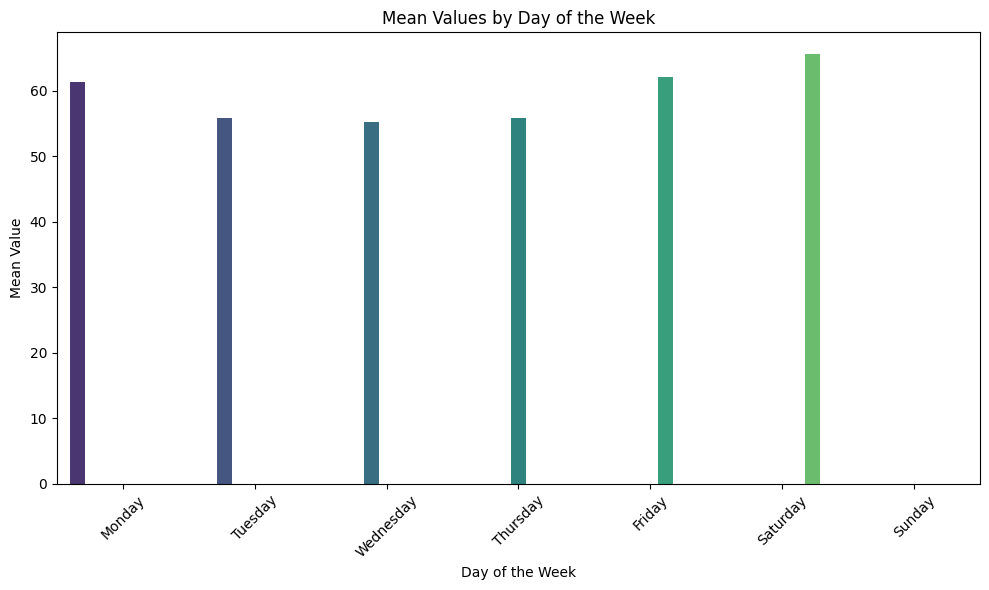

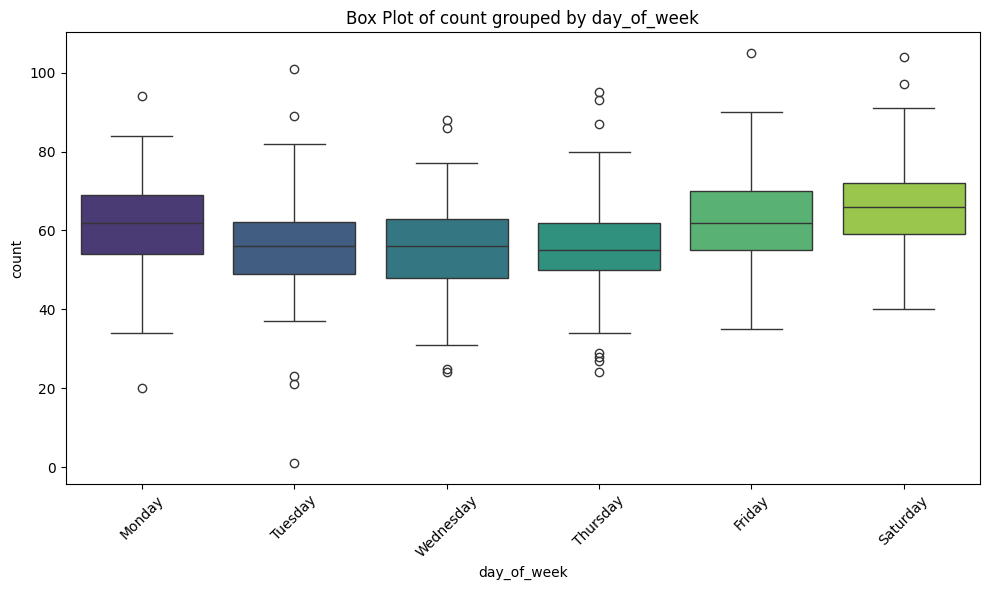

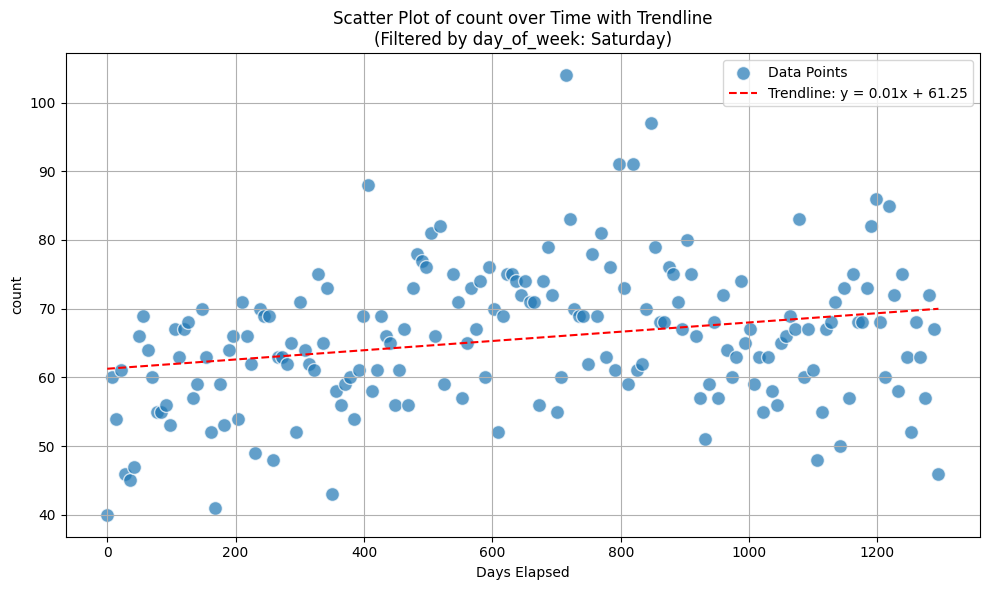

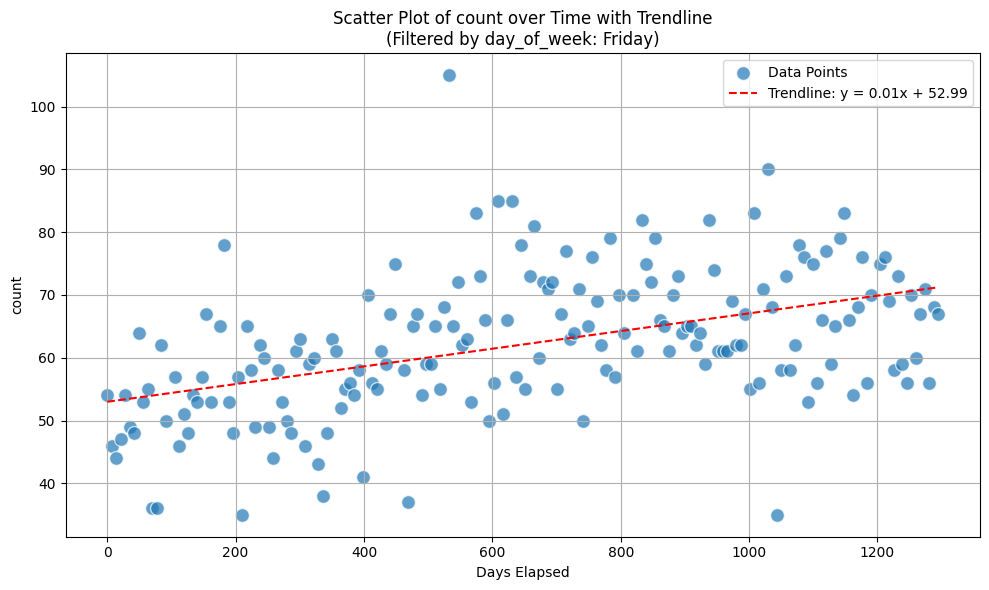

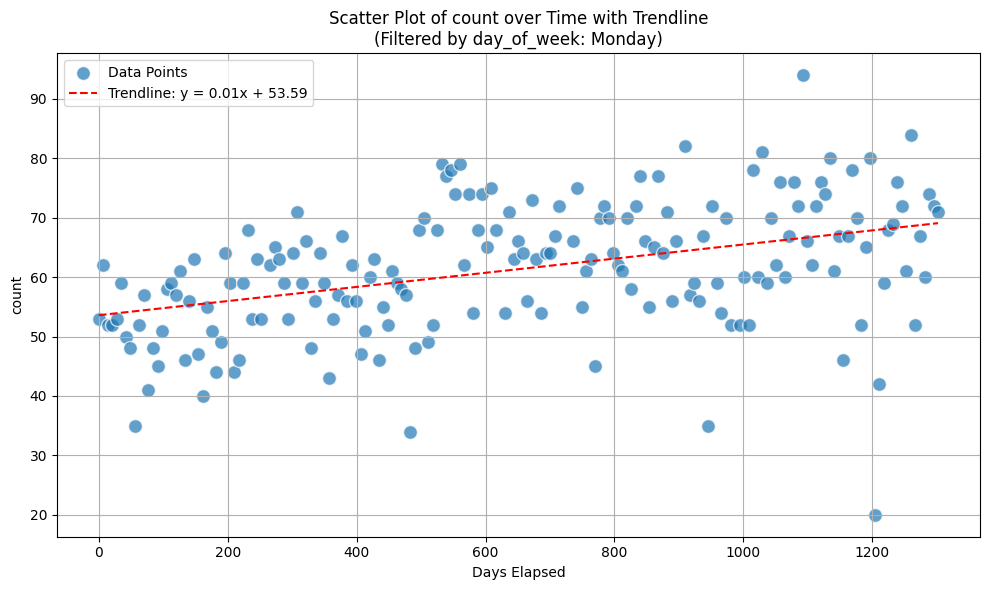

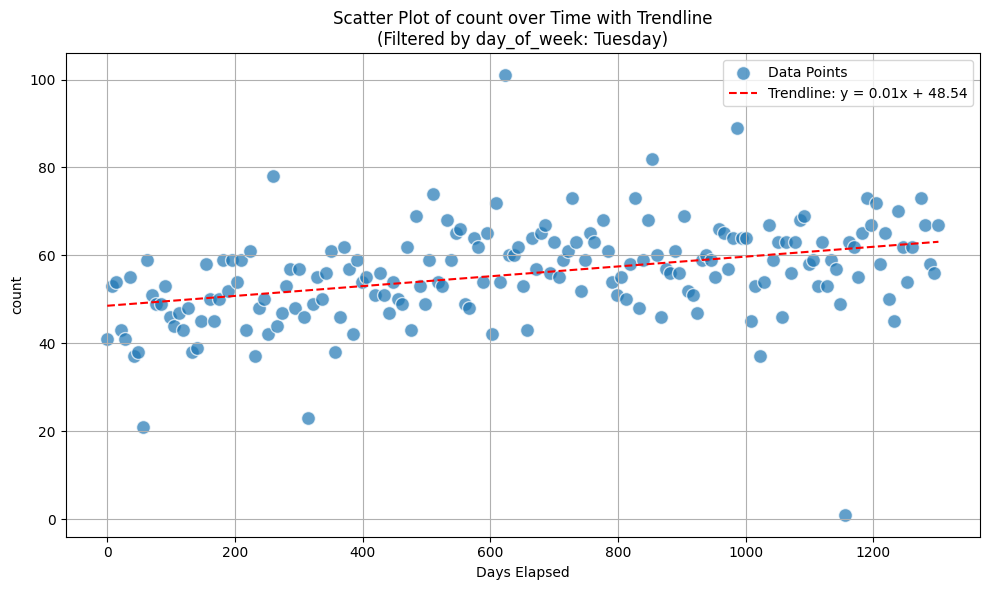

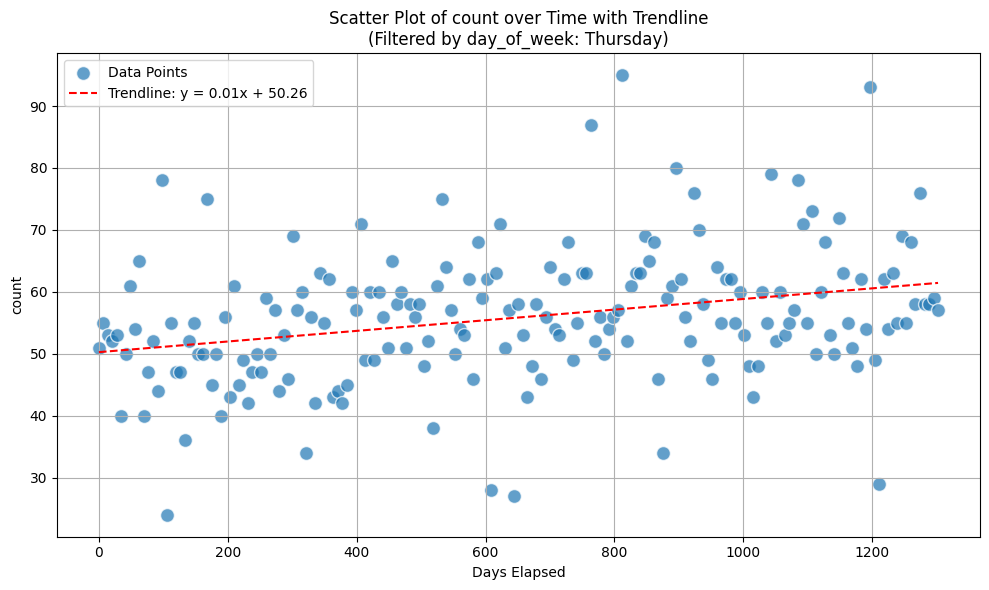

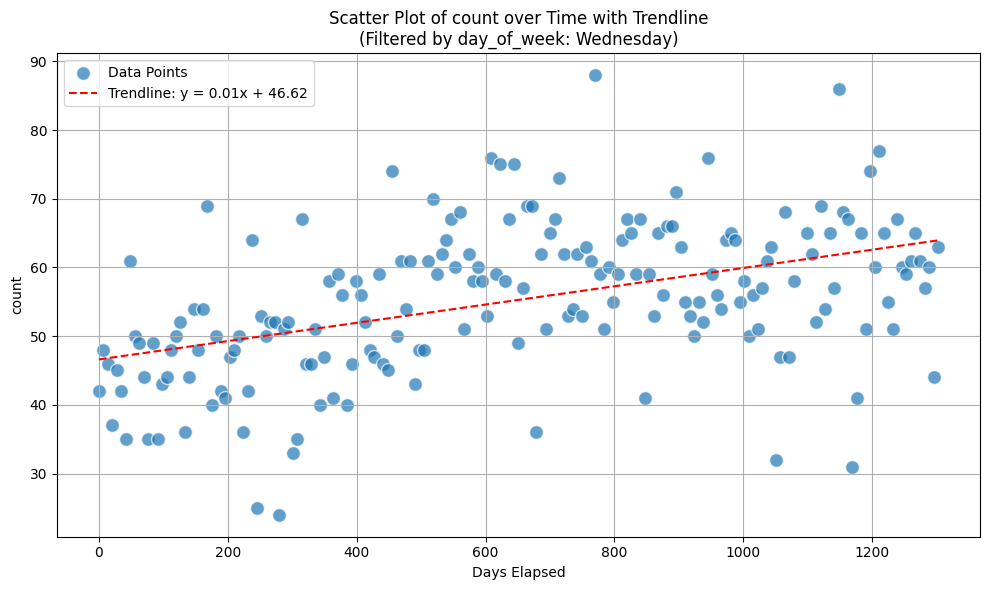

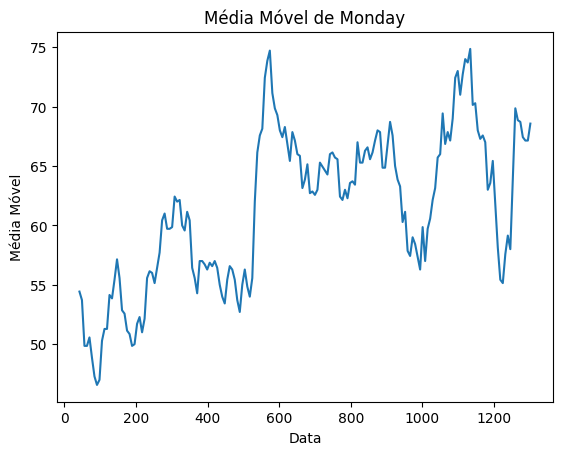

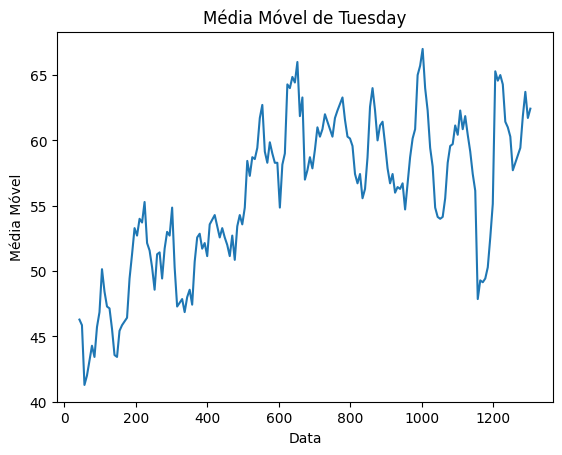

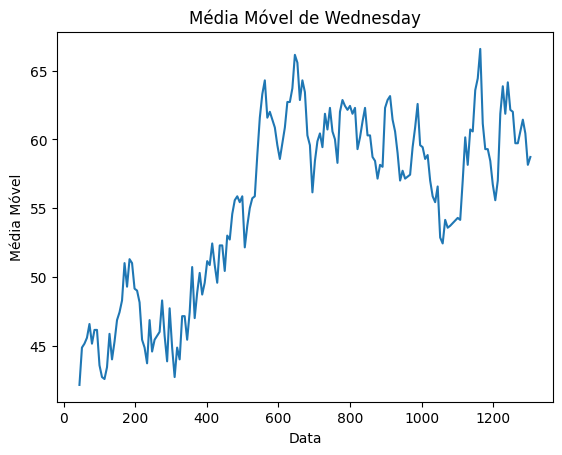

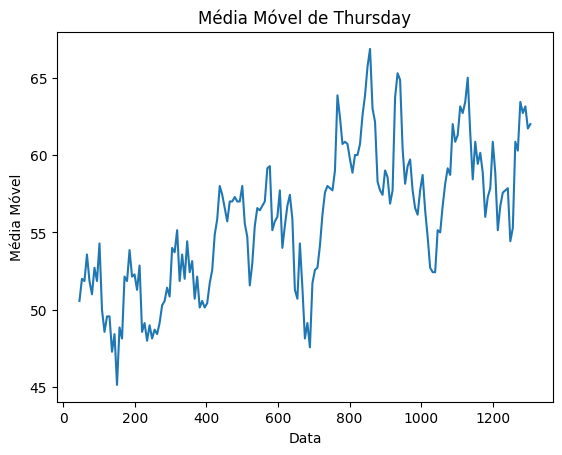

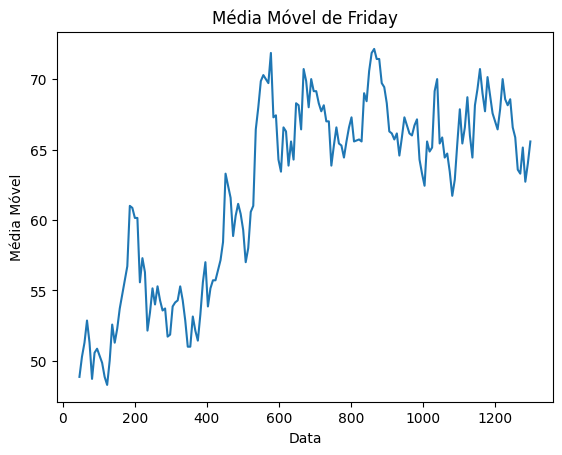

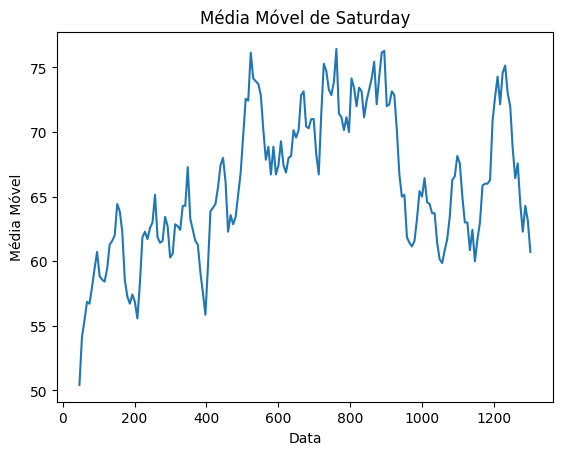

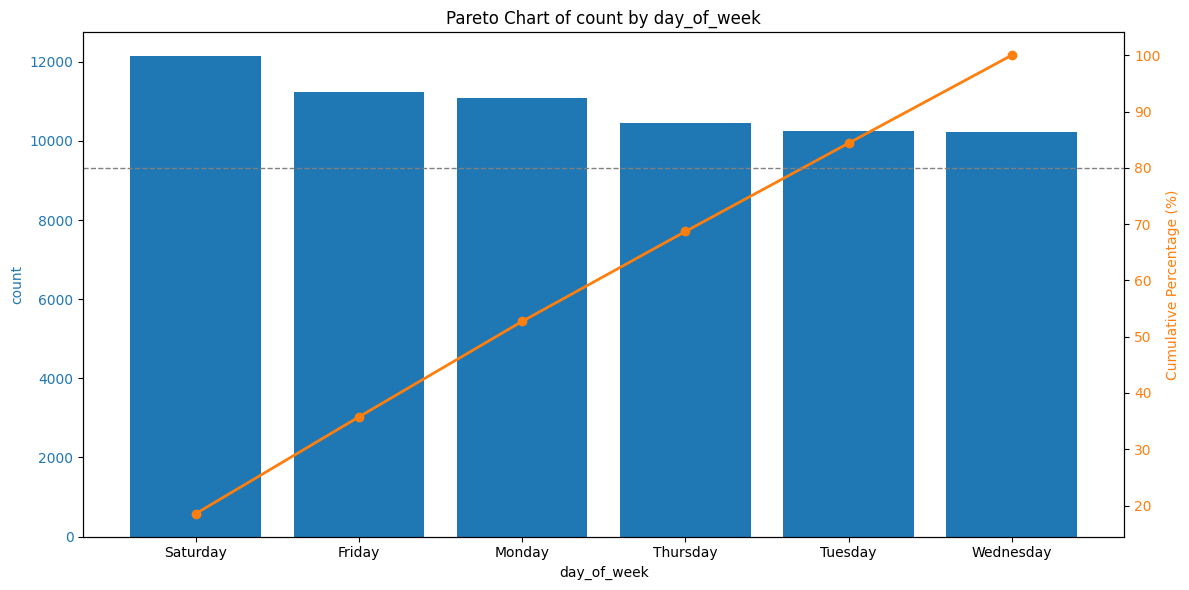

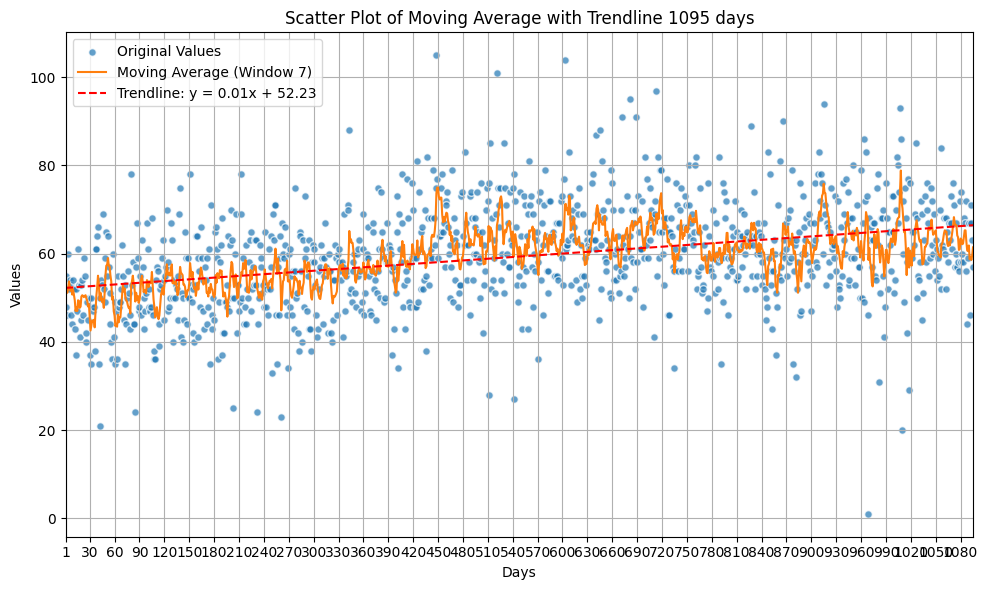

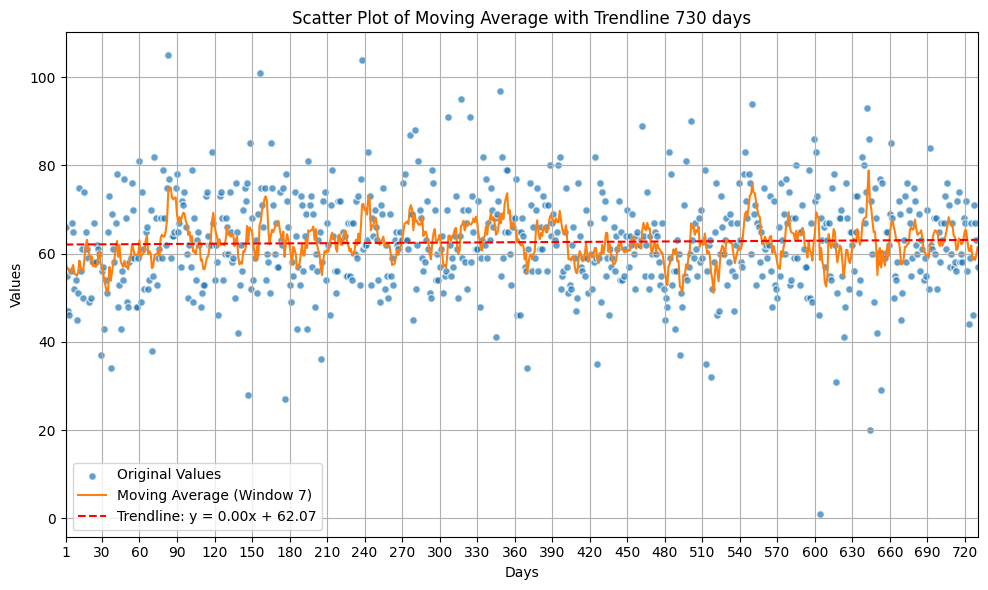

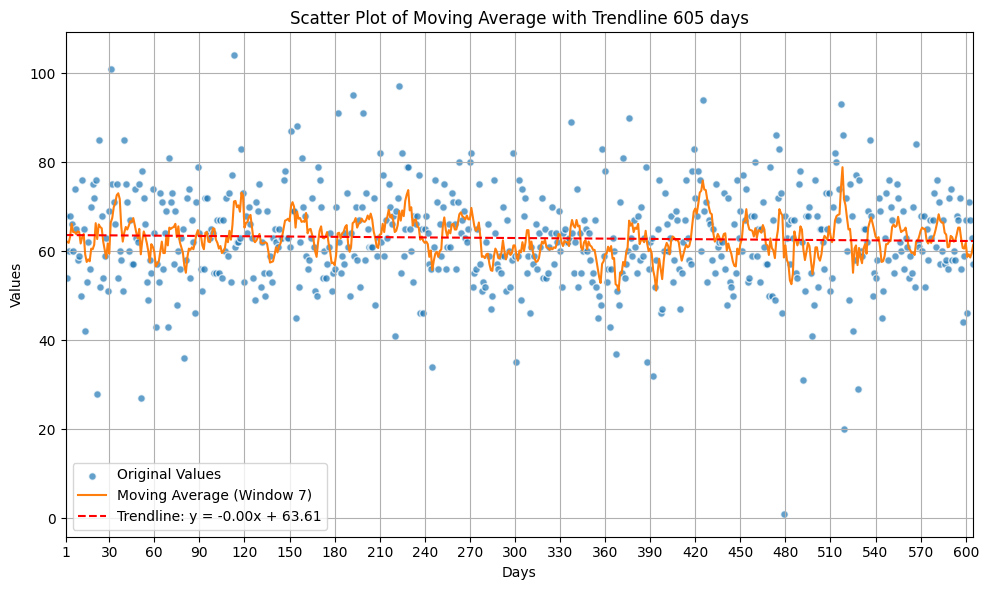

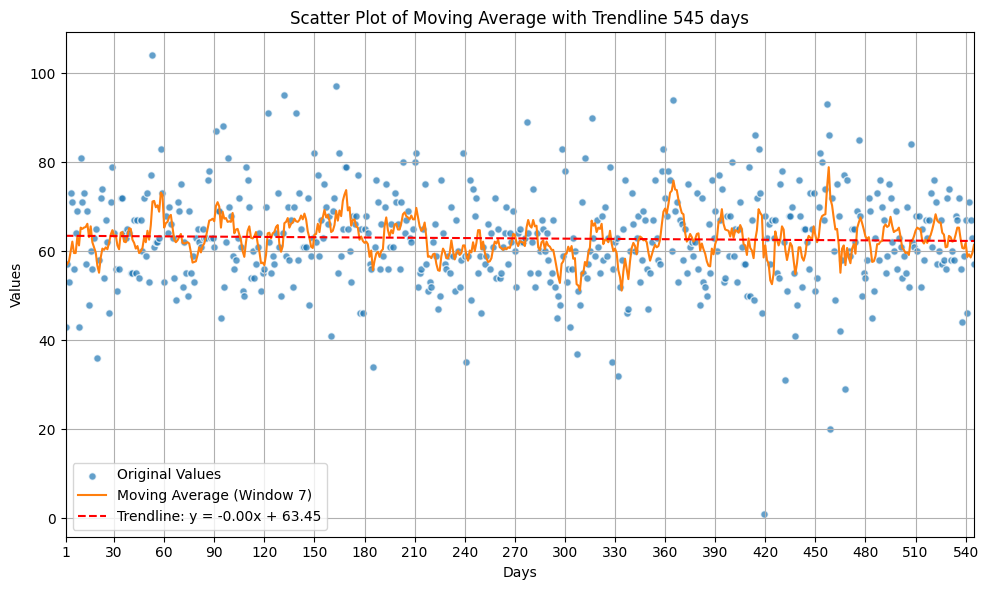

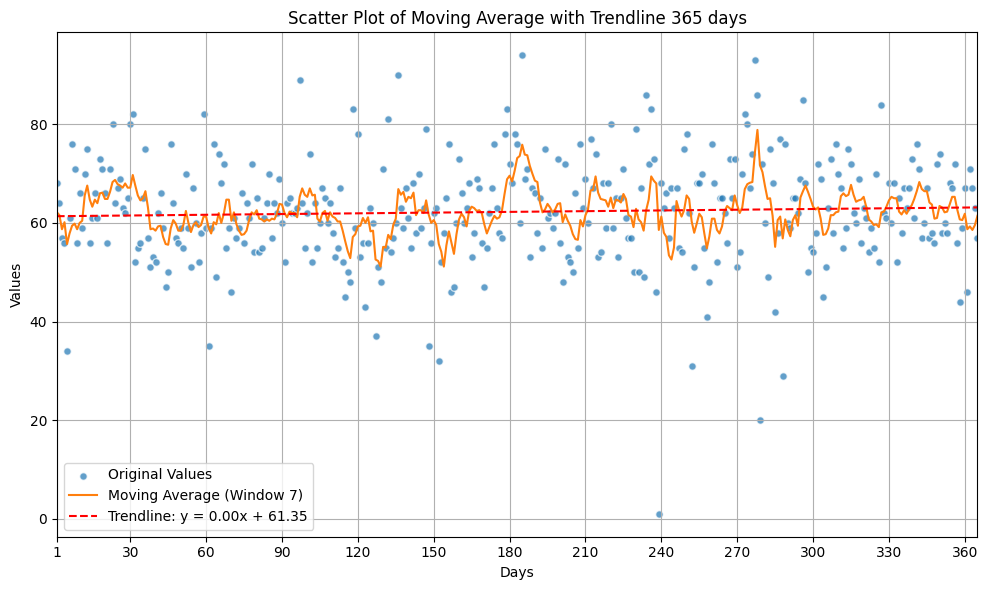

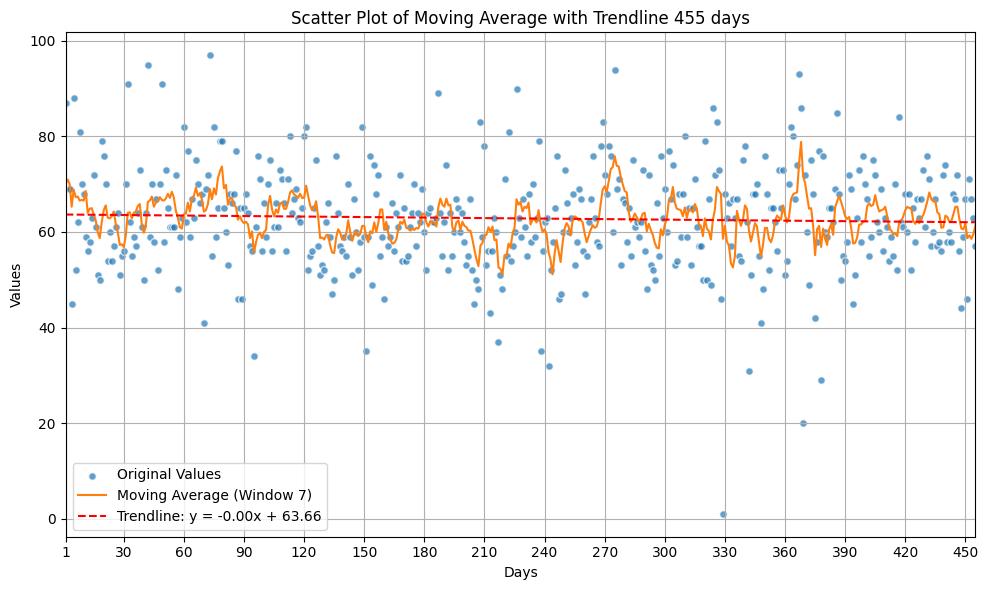

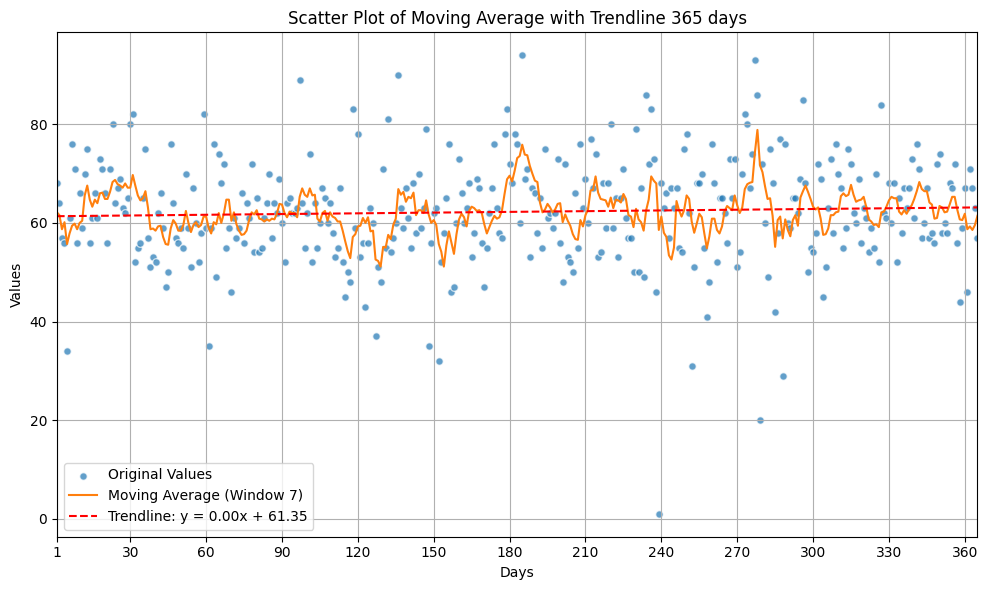

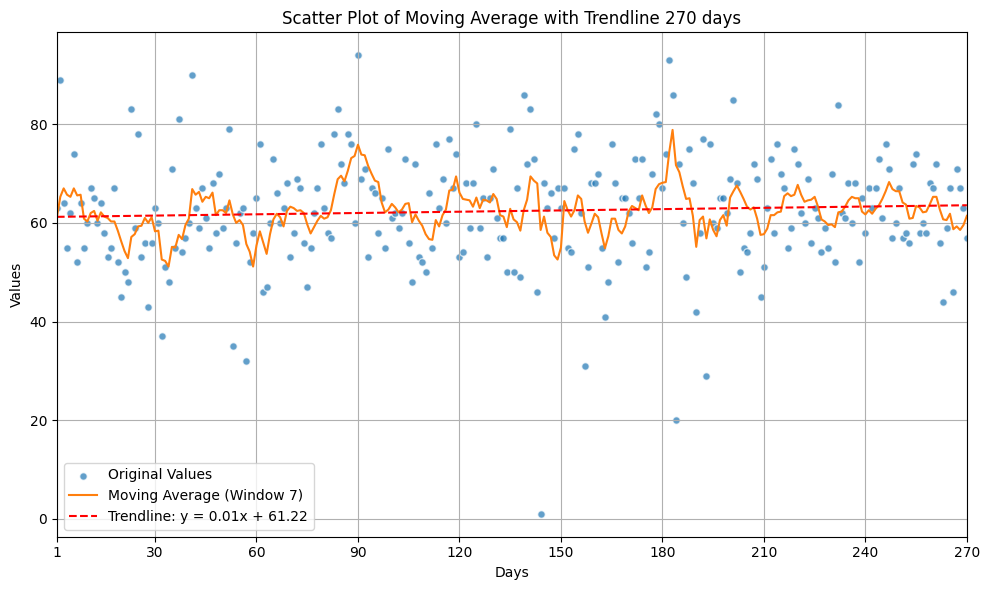

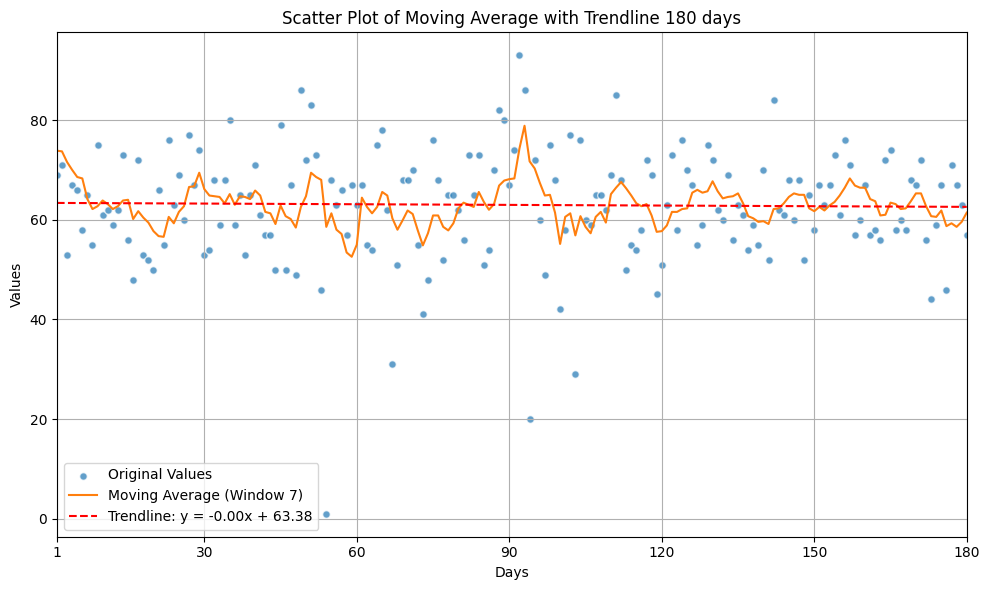

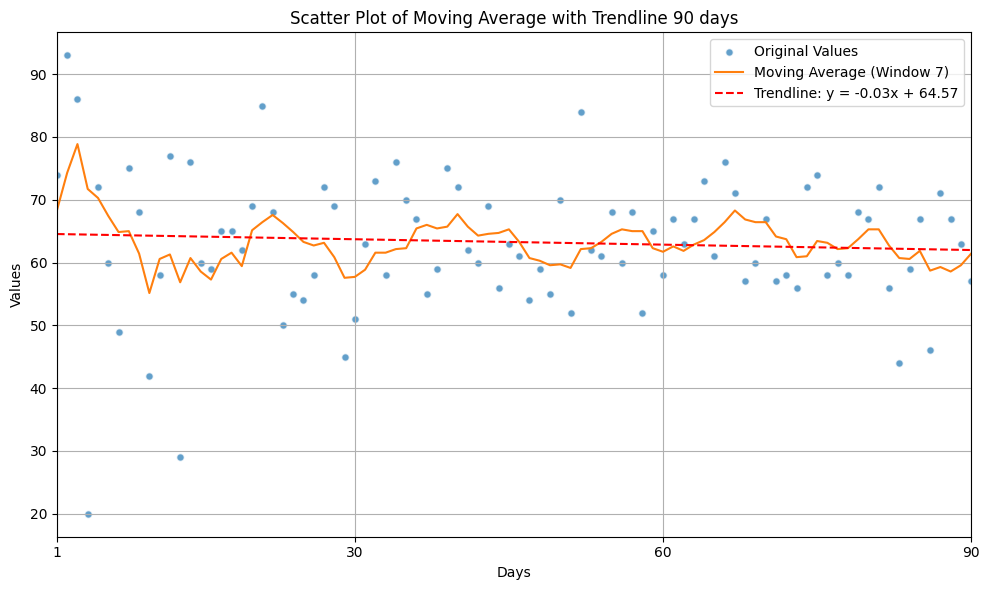

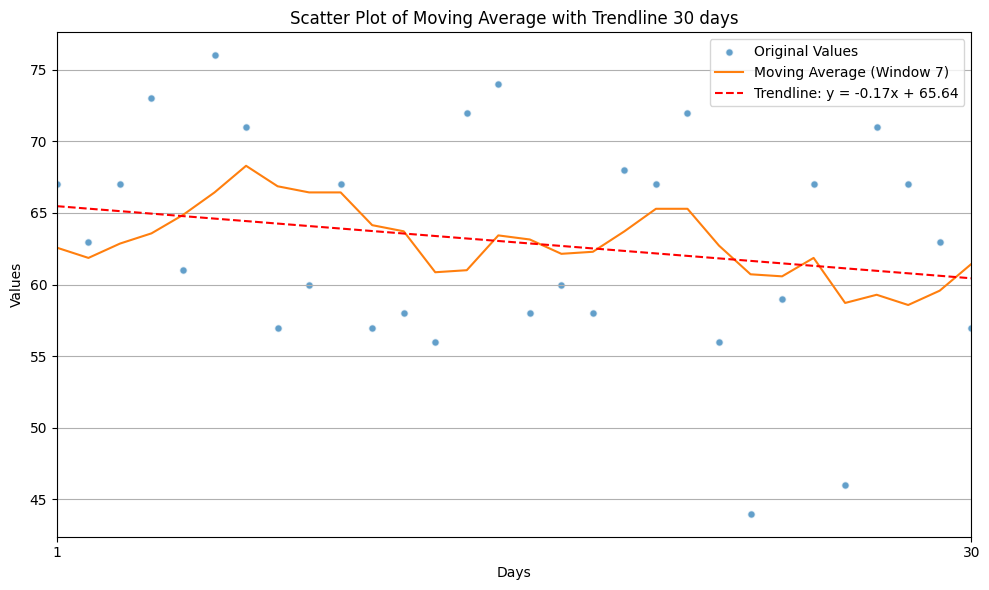

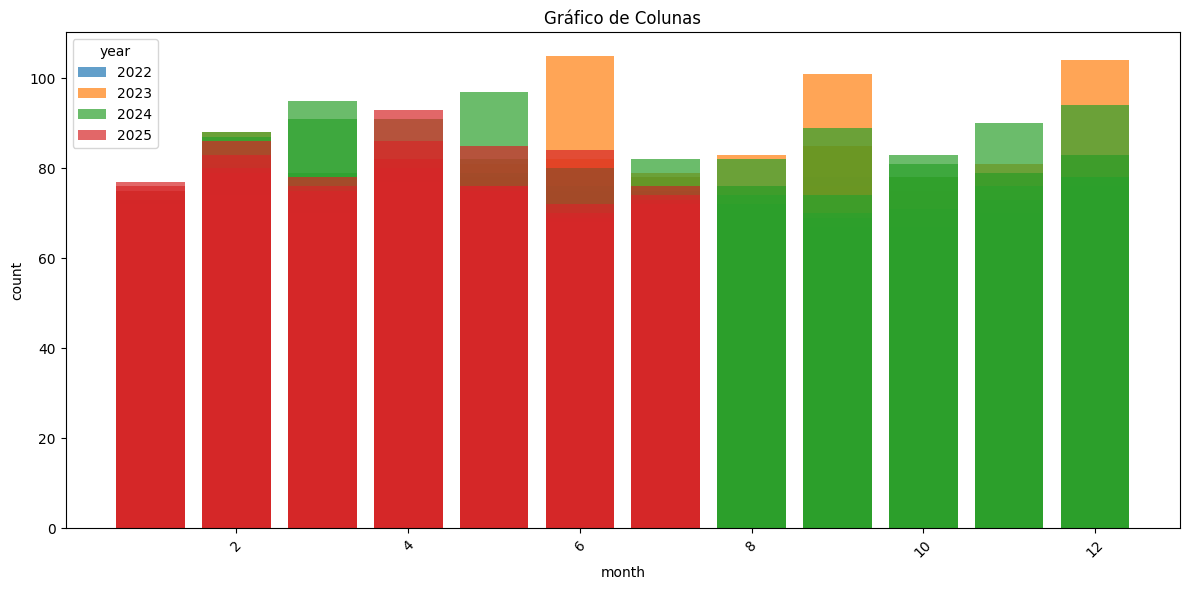

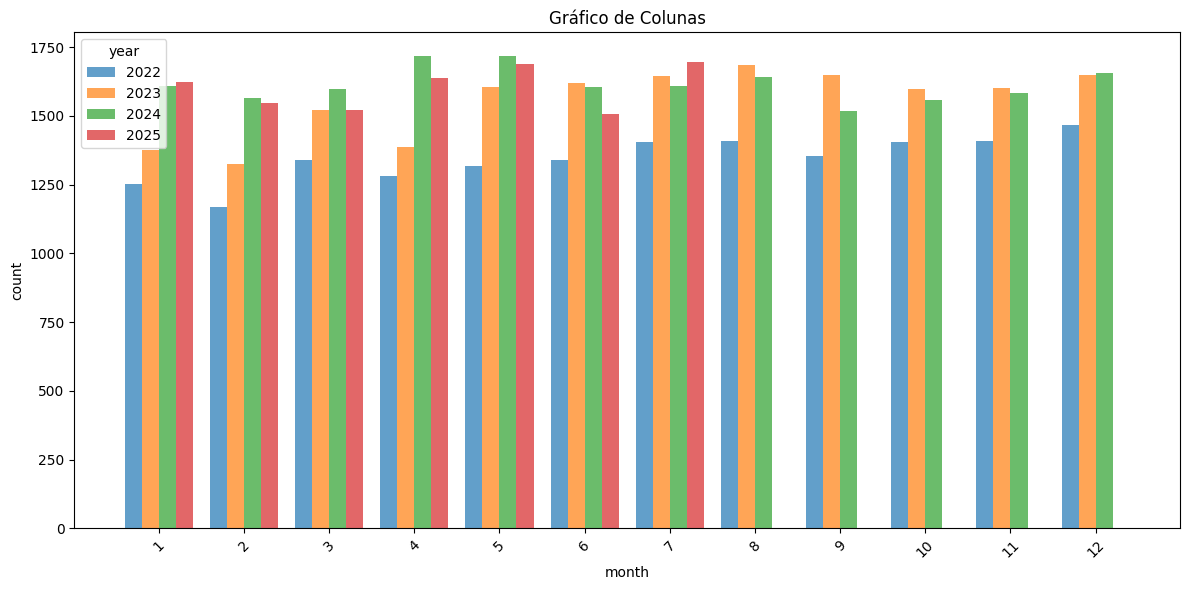

In [ ]:
# Identificação da análise

print(f"ANÁLISE DA QUANTIDADE DE ATENDIMENTOS {empresa.upper()} - {loja.upper()} - {grupo.upper()}")

# Estatísticas básicas gerais
import utils_statistics as us
import utils_graphics as ug
from docx import Document

# Crie um novo documento Word
doc = Document()

# Adicionando um título
doc.add_heading('Conteúdo do Notebook', 0)

# Suponha que você tenha um conteúdo que quer adicionar
output = """
Este é o conteúdo da célula que você deseja exportar para o Word.
Abaixo está um gráfico gerado durante a análise:
"""

# Adiciona o conteúdo textual ao documento
doc.add_paragraph(output)



image_path =  f'{reports}/{empresa}_{grupo}_{loja}_{currenty_time}.png'

df_statistics = us.get_descriptive_statistics(df,'count')
print(df_statistics.head())
df_statistics_day_of_week = us.get_grouped_descriptive_statistics(df,'day_of_week','count')
df_statistics_day_of_week = df_statistics_day_of_week[df_statistics_day_of_week['day_of_week'] != 'Sunday']
df_statistics_day_of_week.sort_values(by='mean', ascending = True)
print(df_statistics_day_of_week)

# Adiciona o conteúdo textual ao documento
doc.add_paragraph(str(df_statistics.head()))
doc.add_paragraph(str(df_statistics_day_of_week.head()))

ug.plot_weekday_means(df_statistics_day_of_week['day_of_week'], df_statistics_day_of_week['mean'],image_path)
# Adiciona a imagem ao documento
doc.add_picture(image_path)
# Salva o documento
doc.save(reports+'/output_notebook_com_imagem.docx')

# Falta salvar essas imagens no arquivo doc da mesma forma que o gráfico de colunas foi salvo
ug.plot_boxplot(df,'day_of_week','count')
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Saturday')
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Friday')
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Monday' )
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Tuesday')
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Thursday')
ug.plot_scatter_with_trendline(df,'date_service', 'count', 'day_of_week', 'Wednesday')

# Calculando a média móvel agrupada por 'day_of_week'
df['moving_avg_day_of_week'] = df.groupby('day_of_week')['count'].transform(lambda x: us.moving_average(x, 7))

# Filtrando o DataFrame para obter a média móvel por dia da semana
df_monday = df[df['day_of_week'] == 'Monday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_monday,'days_elapsed', 'moving_avg_day_of_week', 'Monday')
df_tuesday = df[df['day_of_week'] == 'Tuesday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_tuesday,'days_elapsed', 'moving_avg_day_of_week', 'Tuesday')
df_wednesday = df[df['day_of_week'] == 'Wednesday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_wednesday,'days_elapsed', 'moving_avg_day_of_week', 'Wednesday')
df_thursday = df[df['day_of_week'] == 'Thursday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_thursday,'days_elapsed', 'moving_avg_day_of_week', 'Thursday')
df_friday = df[df['day_of_week'] == 'Friday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_friday,'days_elapsed', 'moving_avg_day_of_week', 'Friday')
df_saturday = df[df['day_of_week'] == 'Saturday'] [ ['days_elapsed', 'moving_avg_day_of_week'] ]
ug.plot_moving_average_by_day_of_week(df_saturday,'days_elapsed', 'moving_avg_day_of_week', 'Saturday')
ug.plot_pareto(df, 'day_of_week', 'count' )
df['moving_avg'] = us.moving_average(df['count'],7)

# Média móvel segmentada por períodos
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30,365*3,True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365*2, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365+240, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365+180, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365+90, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 365, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 270, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 180, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 90, True)
ug.plot_moving_average_with_trendline(df['count'],df['moving_avg'],7,30, 30, True)

# Estatísticas por mês do ano
df_statistics_day_of_week = us.get_grouped_descriptive_statistics(df,'year_month','count')
df_statistics_day_of_week.sort_values(by='year_month', ascending = True)

# Comparativo da quantidade de atendimentos por mês do ano
ug.plot_column_chart_with_legend_stacked(df,'month','count','year')
ug.plot_column_chart_with_legend_side_by_side(df,'month','count','year')